In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
def max_point_annot(x, y, name, frac, ax=None):
        xmax = x[np.argmax(y)]
        ymax = max(y)
        text= "{}\nMax at {:.2f}".format(name, ymax)
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.30,max(0.96 - frac, 0.3)), **kw)

In [24]:
df_results = pd.read_csv("results.csv")
df_results.head()

,Implementation,Amplification,NS Delegations
0,bind9,1,1
1,bind9,1,2
2,bind9,2,3
3,bind9,2,4
4,bind9,3,5


<AxesSubplot:title={'center':'Subqueries unchained'}, xlabel='NS Delegations', ylabel='Amplification factor'>

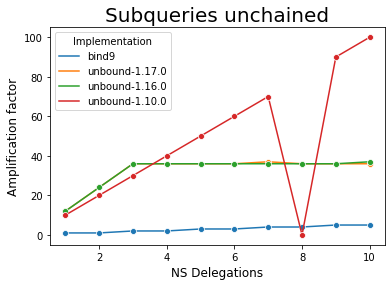

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Subqueries unchained", fontsize = 20)
ax.set_xlabel("NS Delegations", fontsize = 12)
ax.set_ylabel("Amplification factor", fontsize = 12)
sns.lineplot(x="NS Delegations", y="Amplification", hue="Implementation", data=df_results, marker="o", ax=ax)

In [ ]:
def create_combined_plots_simple(list_list_values, filename, implementation_names, folder_path):

    x = range(1, len(list_list_values[0])+1)
    fig = plt.figure()
    ax = fig.add_subplot()

    missing_attributes = []
    ns_del = 0
    cname_chain_length= 0
    nb_labels = 0

    x_labels = "TOBEDEFINED"

    ax.set_xlabel(x_labels, fontsize = 12)
    ax.set_ylabel('Amplification factor', fontsize = 12)

    ax.set_xlim(0,10+1)
    ax.set_ylim(0, 1700)

    fixed_vars = {"ns_del" : "#Del={}".format(str(ns_del)), "cname_chain_length" : "CNAME_length={}".format(str(cname_chain_length)), "nb_labels" : "#Labels={}".format(str(nb_labels))}
    fixed = [fixed_vars[i] for i in fixed_vars.keys()]
    vars = ", ".join(fixed)
    # RElated to the previous : find from the filename what are the fixed attributes
    ax.set_title('Amplification factor c/nameserver with Sub+CCV+QMIN \n Fixed values : {vars}'.format(vars=vars), fontsize = 11)

    ax.grid()
    for list_values in list_list_values:
        ax.plot(x, list_values, marker = 'o')


    plot_path = folder_path+"fig_"+filename.split(".")[0]+".jpg"
    
    # remove the previous path
    if os.path.exists(plot_path):
        os.remove(plot_path)
        #print("removed plot")
        
    

    for i in range(0,len(implementation_names)):
        list_values = list_list_values[i]
        max_point_annot(x,list_values, implementation_names[i], i/len(list_list_values))

    plt.legend(implementation_names)

    plt.savefig(plot_path)
    plt.close()
